In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.family']='sans-serif'
# plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [4]:
# 读取数据
ann_all = []
ann_json = '../data/NEU-DET-scale_coco/annotations/instances_train2014.json'       #这里读取的是我的训练数据的标签
with open(ann_json) as f:
    ann=json.load(f)
ann_all += ann['annotations']
#创建类别标签字典，统计类别数目
category_dic=dict([(i['id'],i['name']) for i in ann['categories']])
counts_label=dict([(i['name'],0) for i in ann['categories']])
for i in ann['annotations']:
    counts_label[category_dic[i['category_id']]]+=1
total_annotations = len(ann['annotations'])
print(counts_label, f"总标注:{total_annotations}")

{'inclusion': 917, 'pitted_surface': 385, 'scratches': 492, 'rolled-in_scale': 555, 'patches': 800, 'crazing': 630} 总标注:3779


In [8]:
from matplotlib import pyplot as plt
from PIL import Image
img = Image.open('../data/WSJ_2_coco/train2014/0.jpg')

In [9]:
img.size

(1024, 1024)

In [5]:
# 读取数据
ann_json = '../data/NEU-DET-scale_coco/annotations/instances_val2014.json'
with open(ann_json) as f:
    ann=json.load(f)
ann_all += ann['annotations']
#创建类别标签字典，统计类别数目
category_dic=dict([(i['id'],i['name']) for i in ann['categories']])
counts_label=dict([(i['name'],0) for i in ann['categories']])
for i in ann['annotations']:
    counts_label[category_dic[i['category_id']]]+=1
total_annotations = len(ann['annotations'])
print(counts_label, f"总标注:{total_annotations}")

{'inclusion': 94, 'pitted_surface': 47, 'scratches': 56, 'rolled-in_scale': 73, 'patches': 81, 'crazing': 59} 总标注:410


In [4]:
import numpy as np
# 标注长宽高比例
box_w = []
box_h = []
box_center_x = []
box_center_y = []
box_wh = []
box_area = []
box_classes = []
density_map = np.zeros((3700,3620))
categorys_wh = [[] for j in range(515)]#这里range的是你类别的数量,这里数字需要大于等于你的数据类别
for a in ann_all:
    box_w.append(round(a['bbox'][2],2))
    box_h.append(round(a['bbox'][3],2))
    box_center_x.append(round(a['bbox'][0] + a['bbox'][2]/2,2))
    box_center_y.append(round(a['bbox'][1] + a['bbox'][3]/2,2))
    density_map[int(a['bbox'][0]):int(a['bbox'][0]+a['bbox'][2]),int(a['bbox'][1]):int(a['bbox'][1]+a['bbox'][3])]+=1
    box_area.append(round(a['bbox'][2],2) * round(a['bbox'][3],2))
    wh = a['bbox'][2]/a['bbox'][3] # 宽高比
    box_classes.append(a['category_id'])
    box_wh.append(wh)
    categorys_wh[a['category_id']-1].append(wh)
box_w = np.array(box_w)
box_h = np.array(box_h)
box_area = np.array(box_area)
box_classes = np.array(box_classes)

In [7]:
box_area

array([ 312., 3498., 3168., ..., 1170.,  304., 1125.])

In [5]:
s_thr = 32 * 4.525
l_thr = 96 * 4.525
# index_s = (box_w <= s_thr) & (box_h <= s_thr)
# index_m = (s_thr < box_w) & (box_w <= l_thr) & (s_thr < box_h) & (box_h <= l_thr)
# index_l = (l_thr < box_w) | (l_thr < box_h)
index_s = box_area < s_thr**2
index_m = (box_area >= s_thr**2) & (box_area < l_thr**2)
index_l = box_area > l_thr**2

In [6]:
sum(index_s)/len(ann_all), sum(index_m)/len(ann_all), sum(index_l)/len(ann_all)

(0.9994334277620397, 0.0005665722379603399, 0.0)

In [8]:
# import matplotlib.pyplot as plt
# from matplotlib import font_manager
import matplotlib
matplotlib.get_cachedir()

# for font in font_manager.fontManager.ttflist:
#     # 查看字体名以及对应的字体文件名
#     print(font.name, '-', font.fname)

'/root/.cache/matplotlib'

In [9]:
matplotlib.scale.get_scale_names()

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']

<class 'matplotlib.colors.ListedColormap'>


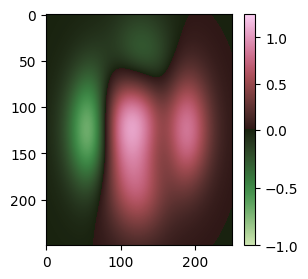

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scicomap as sc
from scicomap.utils import _fn_with_roots

# load the color map
div_map = sc.ScicoDiverging(cmap='watermelon')

# correct the colormap
div_map.unif_sym_cmap(lift=15, 
                      bitonic=False, 
                      diffuse=True)

# get the fixed color map
fixed_cmap = div_map.get_mpl_color_map()
print(type(fixed_cmap))

# use it as you like
im = _fn_with_roots()
norm = mpl.colors.CenteredNorm()
divnorm = mpl.colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1.25)
fig = plt.figure(figsize=(3,3), facecolor="white")
ax = fig.add_subplot(1, 1, 1, facecolor="white")
pos = ax.imshow(im, cmap=fixed_cmap, aspect="auto", norm=divnorm)
fig.colorbar(pos, ax=ax)

In [11]:
import cv2
dst = cv2.blur(density_map, (5,5), 0) 

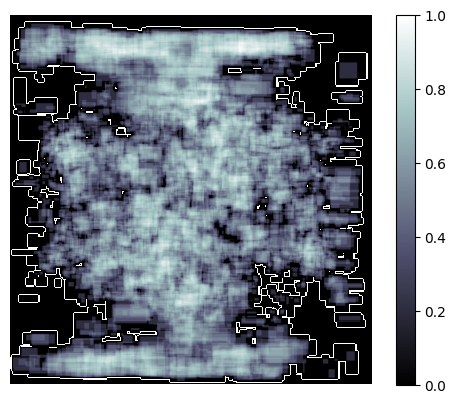

In [38]:
from matplotlib.colors import Normalize
from matplotlib import colors

# load the color map
# ugly_jet = plt.get_cmap("jet")
# div_map = sc.ScicoSequential(cmap='ice')

# # correct the colormap
# div_map.unif_sym_cmap(lift=15, 
#                       bitonic=False, 
#                       diffuse=True)

# # get the fixed color map
# fixed_cmap = div_map.get_mpl_color_map()
fixed_cmap = 'bone'
plt.imshow(density_map, fixed_cmap, interpolation = 'mitchell', norm='log')
plt.axis('off')
plt.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=fixed_cmap), ax=plt.gca())
plt.savefig('pos_distribution.svg', dpi=600, bbox_inches='tight')
plt.savefig('pos_distribution.pdf', dpi=600, bbox_inches='tight')

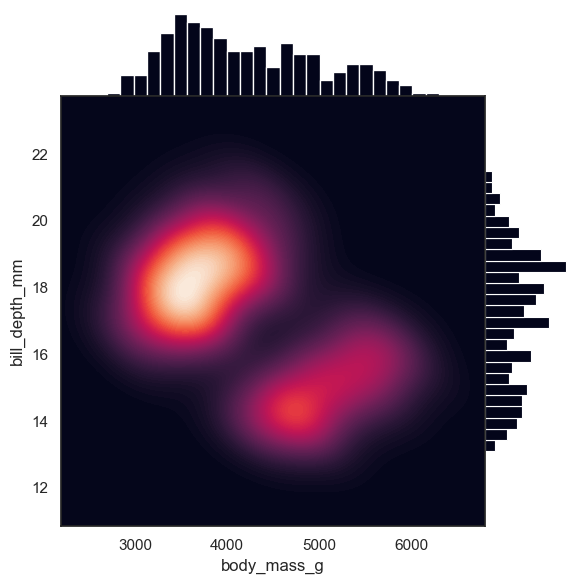

In [46]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

In [48]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [12]:
import pandas as pd
data = pd.DataFrame(np.array([box_center_x, box_center_y]).T, columns=['x', 'y'])

In [10]:
position = g.figure.add_axes([0.1, 0.1, 0.015, .73 ])
cb = g.figure.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap="rocket"), cax=position)

NameError: name 'g' is not defined

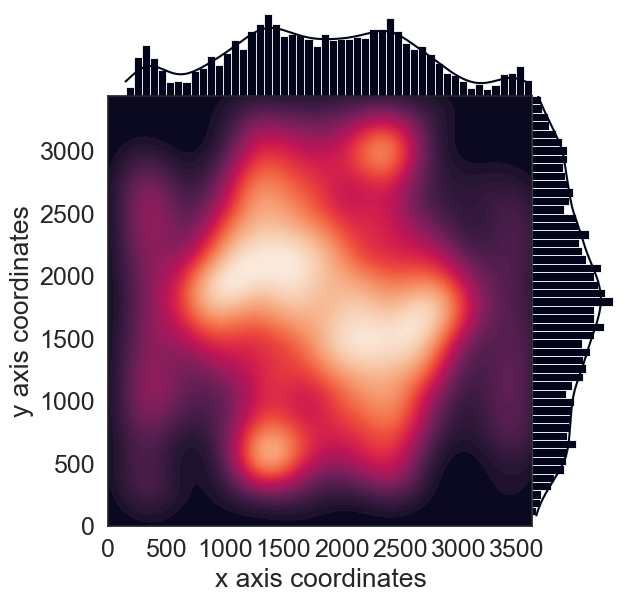

In [16]:
import seaborn as sns
plt.rcParams['font.family'] = ['Arial']
sns.set_theme(style="white")
g = sns.JointGrid(data=data, x="x", y="y", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((0, 3635), (0, 3442)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=50, kde=True)
g.set_axis_labels(xlabel='x axis coordinates', ylabel='y axis coordinates', fontsize=19)
plt.setp(g.ax_joint.get_xticklabels(), fontsize=18)
plt.setp(g.ax_joint.get_yticklabels(), fontsize=18)
g.savefig('kernel_density.pdf',dpi=600,bbox_inches='tight')
g.savefig('kernel_density.svg',dpi=600,bbox_inches='tight')
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
# position = g.figure.add_axes([0.11, 0.1, 0.01, .725 ])
# g.figure.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap="rocket"), cax=position)
# plt.sca(g.ax_joint)
# plt.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap="rocket"), ax=plt.gca(),location='left')

In [126]:
bins

array([3.0400000e+02, 7.4495600e+03, 1.4595120e+04, 2.1740680e+04,
       2.8886240e+04, 3.6031800e+04, 4.3177360e+04, 5.0322920e+04,
       5.7468480e+04, 6.4614040e+04, 7.1759600e+04, 7.8905160e+04,
       8.6050720e+04, 9.3196280e+04, 1.0034184e+05, 1.0748740e+05,
       1.1463296e+05, 1.2177852e+05, 1.2892408e+05, 1.3606964e+05,
       1.4321520e+05, 1.5036076e+05, 1.5750632e+05, 1.6465188e+05,
       1.7179744e+05, 1.7894300e+05, 1.8608856e+05, 1.9323412e+05,
       2.0037968e+05, 2.0752524e+05, 2.1467080e+05, 2.2181636e+05,
       2.2896192e+05, 2.3610748e+05, 2.4325304e+05, 2.5039860e+05,
       2.5754416e+05, 2.6468972e+05, 2.7183528e+05, 2.7898084e+05,
       2.8612640e+05, 2.9327196e+05, 3.0041752e+05, 3.0756308e+05,
       3.1470864e+05, 3.2185420e+05, 3.2899976e+05, 3.3614532e+05,
       3.4329088e+05, 3.5043644e+05, 3.5758200e+05])

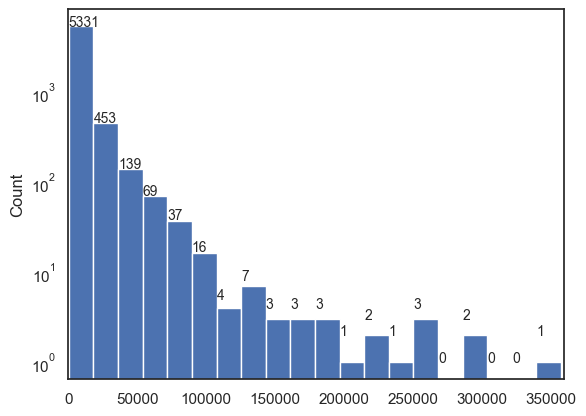

In [137]:
frequency, bins, _ = plt.hist(box_area, 20, log=True)
plt.xlim([0,360000])
plt.ylabel('Count')
for i in range(len(frequency)):
    plt.text(bins[i]+0.8, frequency[i]+1, '%d'%frequency[i], fontsize=10)

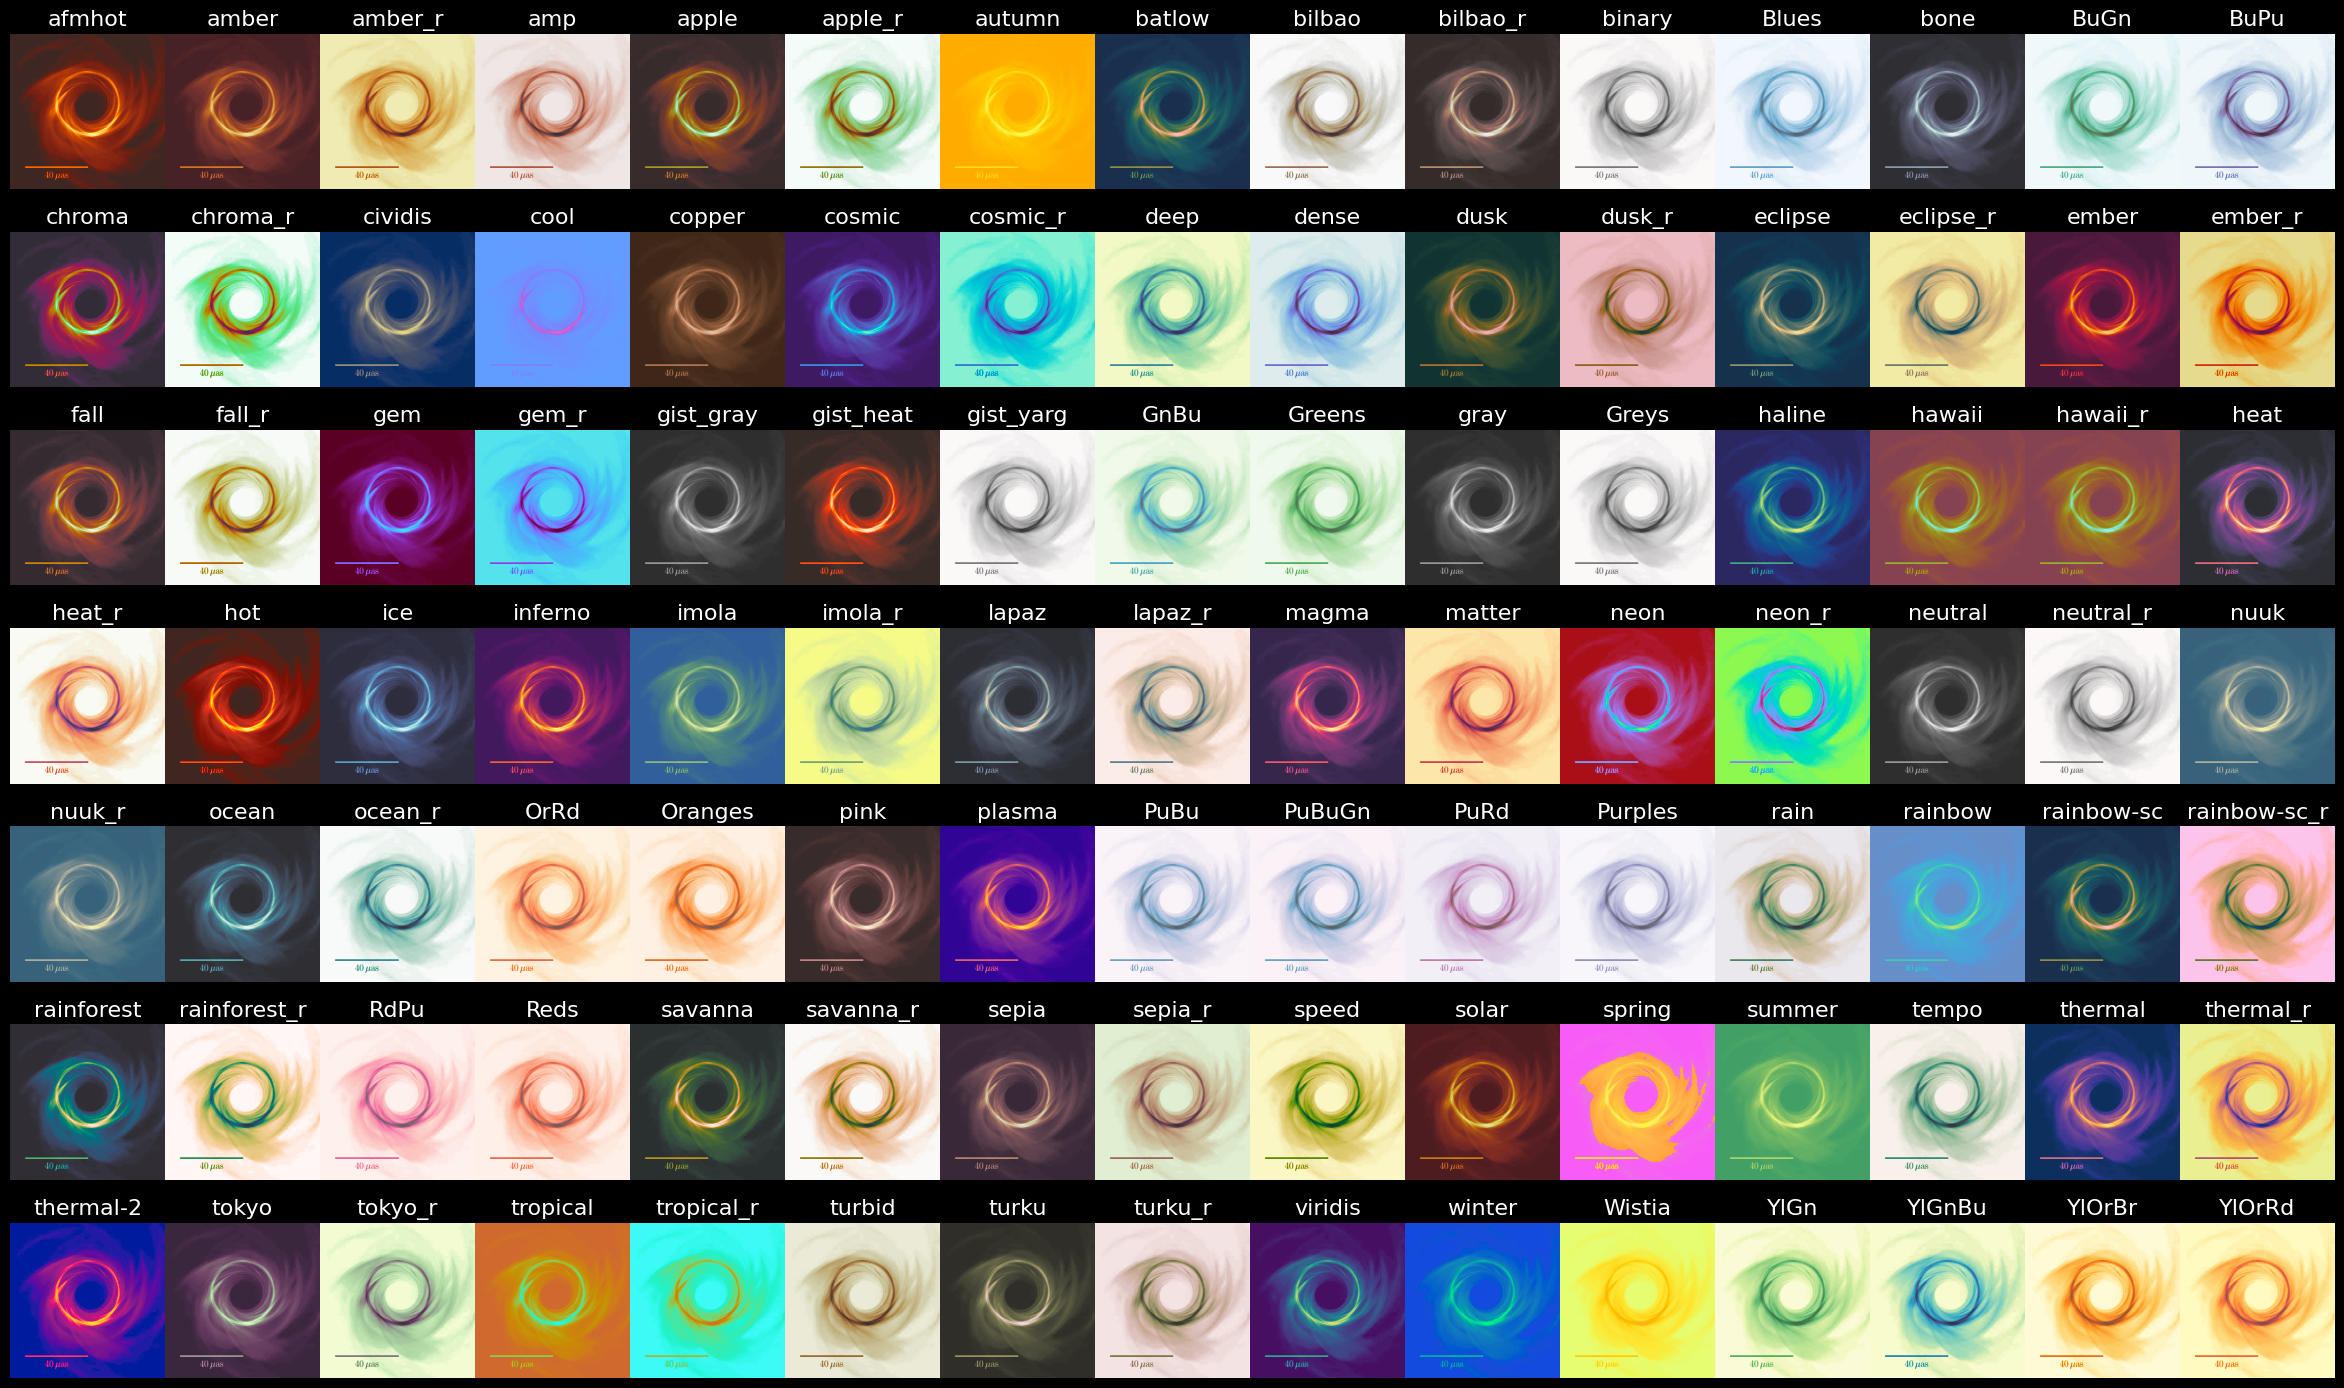

In [77]:
f = sc.compare_cmap(image="grmhd", 
                    ctype='sequential', 
                    ncols=15, 
                    uniformize=True, 
                    symmetrize=True, 
                    unif_kwargs={'lift': 20}, 
                    sym_kwargs={'bitonic': False, 'diffuse': True})

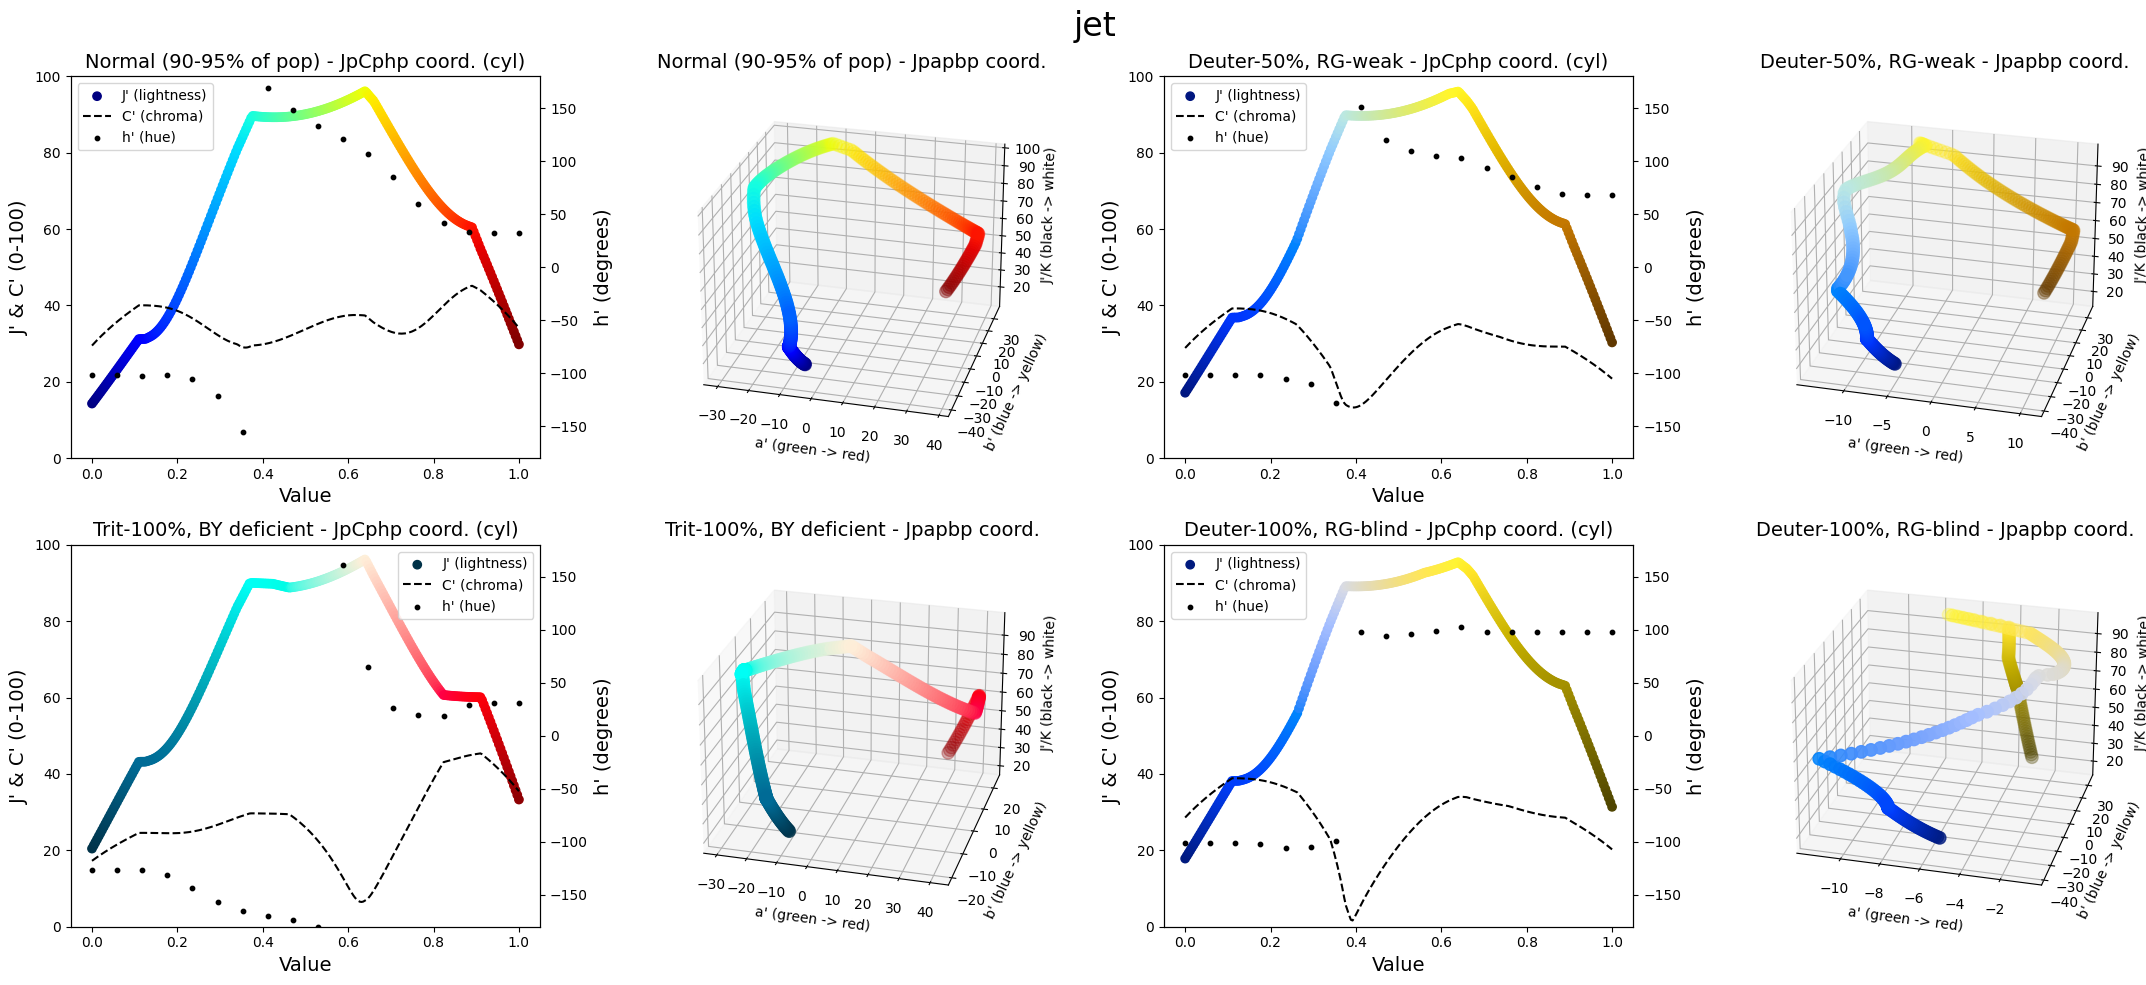

In [9]:
from matplotlib import pyplot as plt
import scicomap as sc
# the thing that should not be
ugly_jet = plt.get_cmap("jet")
sc_map =  sc.ScicoMiscellaneous(cmap=ugly_jet)
f=sc_map.assess_cmap(figsize=(22,10))
f.set_facecolor("w")

In [10]:
sc_map = sc.SciCoMap()
sc_map.get_ctype()

dict_keys(['diverging', 'sequential', 'multi-sequential', 'circular', 'miscellaneous', 'qualitative'])

In [13]:
sc.ScicoDiverging().get_color_map_names(), sc.ScicoSequential().get_color_map_names(), sc.ScicoMultiSequential().get_color_map_names(), sc.ScicoCircular().get_color_map_names(), sc.ScicoMiscellaneous().get_color_map_names(), sc.ScicoQualitative().get_color_map_names()

(dict_keys(['berlin', 'bjy', 'bky', 'BrBG', 'broc', 'bwr', 'coolwarm', 'curl', 'delta', 'fusion', 'fusion_r', 'guppy', 'guppy_r', 'iceburn', 'iceburn_r', 'lisbon', 'PRGn', 'PiYG', 'pride', 'pride_r', 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'redshift', 'redshift_r', 'roma', 'seasons_r', 'seismic', 'spectral', 'turbo', 'vanimo', 'vik', 'viola', 'viola_r', 'waterlily', 'waterlily_r', 'watermelon', 'watermelon_r', 'wildfire', 'wildfire_r']),
 dict_keys(['afmhot', 'amber', 'amber_r', 'amp', 'apple', 'apple_r', 'autumn', 'batlow', 'bilbao', 'bilbao_r', 'binary', 'Blues', 'bone', 'BuGn', 'BuPu', 'chroma', 'chroma_r', 'cividis', 'cool', 'copper', 'cosmic', 'cosmic_r', 'deep', 'dense', 'dusk', 'dusk_r', 'eclipse', 'eclipse_r', 'ember', 'ember_r', 'fall', 'fall_r', 'gem', 'gem_r', 'gist_gray', 'gist_heat', 'gist_yarg', 'GnBu', 'Greens', 'gray', 'Greys', 'haline', 'hawaii', 'hawaii_r', 'heat', 'heat_r', 'hot', 'ice', 'inferno', 'imola', 'imola_r', 'lapaz', 'lapaz_r', 'magma', 'matter', 'neon'

In [9]:
from matplotlib import pyplot as plt
import matplotlib.font_manager
plt.rcParams['font.family'] = ['Arial']

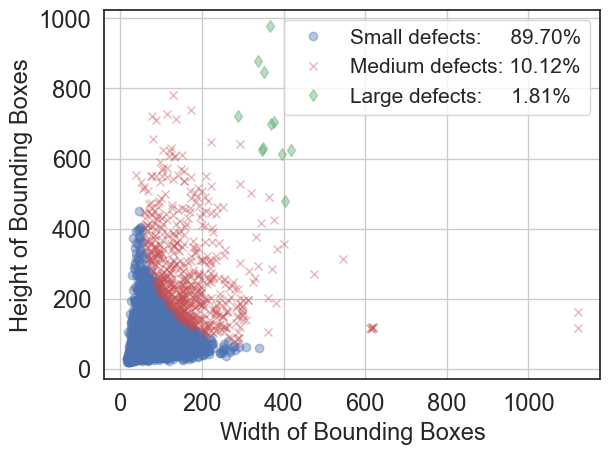

In [23]:
plt.plot(box_w[index_s], box_h[index_s], 'bo', alpha=0.4, label='Small defects:     89.70%')
plt.plot(box_w[index_m], box_h[index_m], 'rx', alpha=0.4, label='Medium defects: 10.12%')
plt.plot(box_w[index_l], box_h[index_l], 'gd', alpha=0.4, label='Large defects:     1.81%')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Width of Bounding Boxes', fontsize=17)
plt.ylabel('Height of Bounding Boxes', fontsize=17)
plt.grid()
plt.legend(fontsize=15)
plt.savefig('Distribution_of_Bounding_Box_Area.svg', dpi=600, bbox_inches='tight')
plt.savefig('Distribution_of_Bounding_Box_Area.pdf', dpi=600, bbox_inches='tight')

In [20]:
sum(box_classes==0) / len(box_classes), sum(box_classes==1) / len(box_classes)

(0.7129218106995885, 0.2870781893004115)

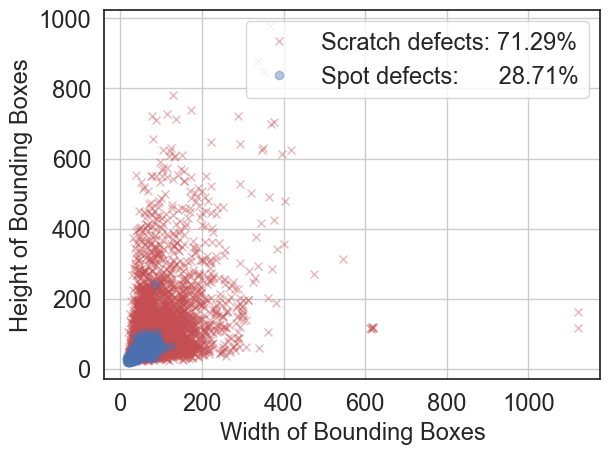

In [22]:
plt.plot(box_w[box_classes==0], box_h[box_classes==0], 'rx', alpha=0.4, label='Scratch defects: 71.29%')
plt.plot(box_w[box_classes==1], box_h[box_classes==1], 'bo', alpha=0.4, label='Spot defects:      28.71%')
plt.xlabel('Width of Bounding Boxes', fontsize=17)
plt.ylabel('Height of Bounding Boxes', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.grid()
plt.legend(fontsize=17)
plt.savefig('Distribution_of_Bounding_Box_Class.svg', dpi=600, bbox_inches='tight')
plt.savefig('Distribution_of_Bounding_Box_Class.pdf', dpi=600, bbox_inches='tight')

平均值：1.042，标准差：0.675


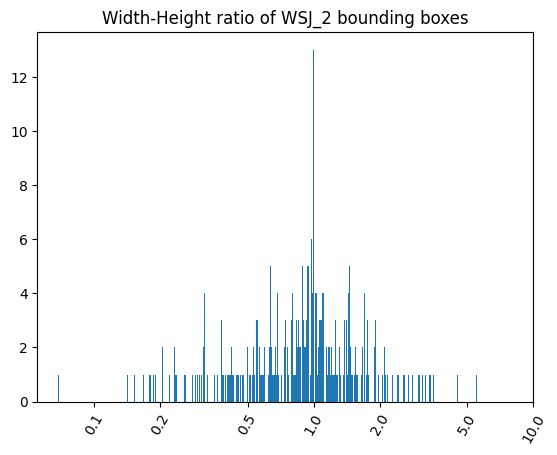

In [29]:
from matplotlib import pyplot as plt

print(f"平均值：{np.mean(box_wh):.3f}，标准差：{np.std(box_wh):.3f}")
box_wh_ = np.log(box_wh)
plt.hist(box_wh_, bins=1000)
plt.xticks(np.log([0.1,0.2,0.5,1.0,2.0,5.0,10.0]), [0.1,0.2,0.5,1.0,2.0,5.0,10.0], rotation=60)
plt.title("Width-Height ratio of WSJ_2 bounding boxes")
plt.show()

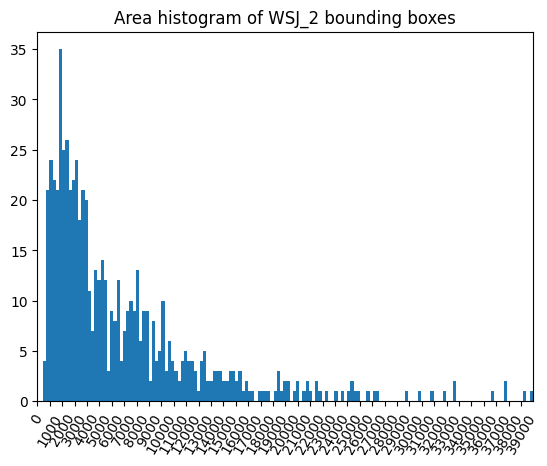

In [30]:
from matplotlib import pyplot as plt
plt.hist(box_area, bins=1000)
plt.xlim([0, 40000])
plt.xticks(range(0,40000,1000), rotation=60)
plt.title("Area histogram of WSJ_2 bounding boxes")
plt.show()